In [1]:
#import
import pandas as pd
import matplotlib.pyplot as plt # == from matplotlib import pyplot as plt

from matplotlib import font_manager, rc

font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font',family = font_name)

In [2]:
df = pd.read_excel('./data_4/시도별_전출입_인구수.xlsx')
df.tail()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501
324,NaN,제주특별자치도,9290,12427,12210,16158,19580,34221,23291,31028,...,59564,55673,55507,59846,54280,60607,59673,59036,66444,63275


In [3]:
# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.ffill() # front fill
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [4]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul = df_seoul.rename({'전입지별' : '전입지'}, axis = 1)
df_seoul = df_seoul.set_index('전입지')
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [5]:
# 서울 -> 경기
sr_one = df_seoul.loc['경기도']
sr_one

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object

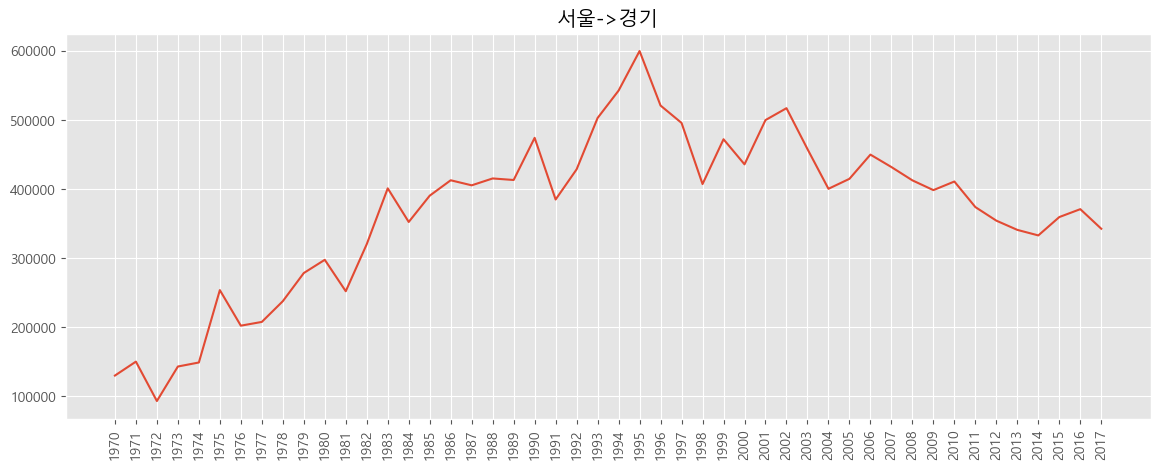

In [6]:
plt.style.use('ggplot')
plt.figure(figsize = (14,5))
plt.xticks(size = 10, rotation = 'vertical')
plt.title('서울->경기')
plt.plot(sr_one.index, sr_one.values)

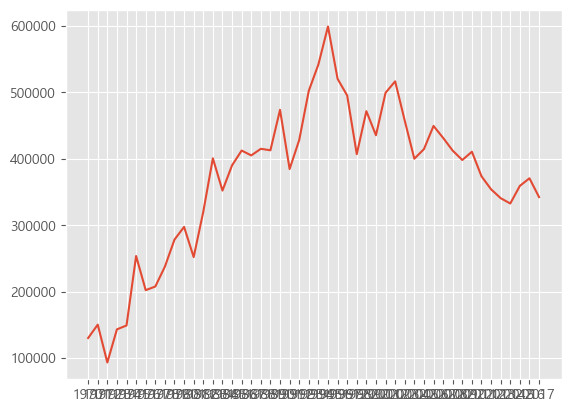

In [7]:
plt.plot(sr_one)

<Axes: >

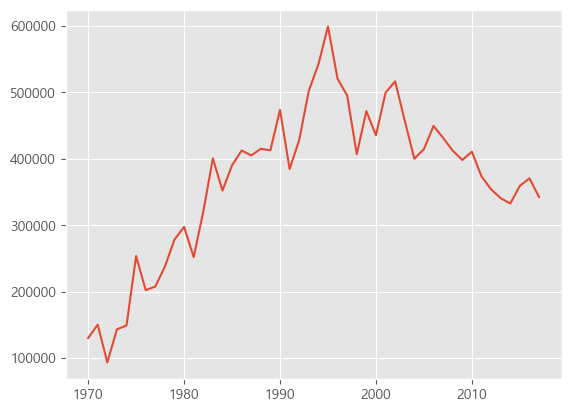

In [8]:
sr_one.plot(kind = 'line')

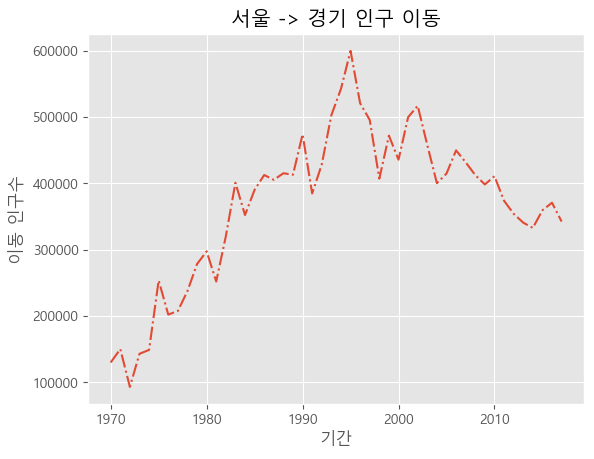

In [9]:
sr_one.plot(kind = 'line', linestyle = '-.')
plt.title('서울 -> 경기 인구 이동')

plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

In [10]:
df = df.ffill() # front fill
mask2 = (df['전출지별'] == '제주특별자치도') & (df['전입지별'] != '제주특별자치도')
df_jeju = df[mask2]
df_jeju = df_jeju.drop(['전출지별'], axis = 1)
df_jeju = df_jeju.rename({'전입지별' : '전입지'}, axis = 1)
df_jeju = df_jeju.set_index('전입지')
df_jeju

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,17705,22976,18753,28762,34753,60840,43315,51682,54648,49818,...,82360,77590,76787,80365,74625,81028,81396,83323,92193,91022
서울특별시,3881,4885,2339,7411,8470,14272,9900,10103,10757,9557,...,6100,5955,5632,5268,5612,5410,5739,6351,6634,7209
부산광역시,1418,2177,1374,1742,2222,3206,2776,2880,5056,2879,...,1980,1805,1707,1639,1525,1576,1742,1773,1853,2029
대구광역시,-,-,-,-,-,-,-,-,-,-,...,628,639,609,548,624,620,631,734,823,1003
인천광역시,-,-,-,-,-,-,-,-,-,-,...,1237,1074,1077,1053,1104,1167,1222,1287,1414,1552
광주광역시,-,-,-,-,-,-,-,-,-,-,...,787,788,801,725,765,767,668,793,741,898
대전광역시,-,-,-,-,-,-,-,-,-,-,...,501,498,522,439,462,480,570,603,631,688
울산광역시,-,-,-,-,-,-,-,-,-,-,...,431,419,380,337,397,356,392,441,430,403
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,58,74,134,188,210,255


Text(0, 0.5, '이동 인구수')

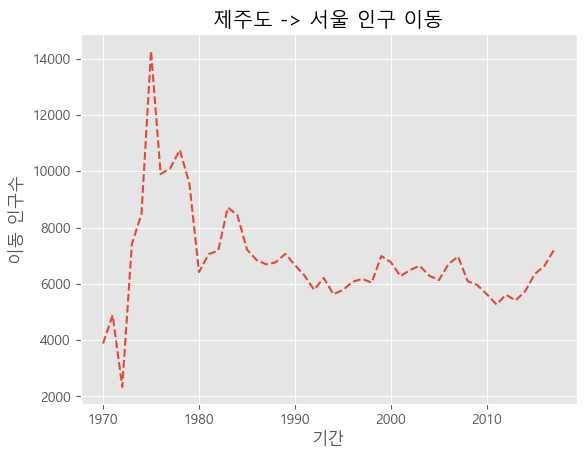

In [11]:
sr_jeju = df_jeju.loc['서울특별시']
sr_jeju.plot(kind = 'line', linestyle = '--')
plt.title('제주도 -> 서울 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

In [12]:
df = pd.read_excel('./data_4/전출지_전입지_시도_별_이동자수.xlsx')
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,7755286,7378430,7154226,7297099,7104398,7735491,7213422,6152155,6128738,6283319
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,1589431,1515602,1472937,1439707,1426493,1578127,1418187,1201527,1206963,1221380
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,507031,459015,439073,416095,411704,491829,441323,383848,364271,378597
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,351424,328228,321182,321158,312419,347248,304761,265354,296291,303544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전북특별자치도,139,202,141,210,219,415,392,408,...,683,733,768,902,1032,1007,986,878,975,876
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1062,1127,1102,1254,1302,1466,1326,1194,1109,1162
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,903,931,994,1146,1229,1181,1261,1177,1161,1263
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1500,1448,1501,1780,1825,1861,1947,1798,1783,1806


In [13]:
# 제주 -> 서울
df = df.ffill() # front fill
mask3 = (df['전출지별'] == '제주특별자치도') & (df['전입지별'] != '제주특별자치도')
df_jeju = df[mask3]
df_jeju = df_jeju.drop(['전출지별'], axis = 1)
df_jeju = df_jeju.rename({'전입지별' : '전입지'}, axis = 1)
df_jeju = df_jeju.set_index('전입지')
df_jeju

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
전입지,,,,,,,,,,,,,,,,,,,,,
전국,17705,22976,18753,28762,34753,60840,43315,51682,54648,49818,...,83323,92193,91022,95349,92030,94736,91062,83717,83195,85056
서울특별시,3881,4885,2339,7411,8470,14272,9900,10103,10757,9557,...,6351,6634,7209,7720,8513,8704,8498,8399,8168,8037
부산광역시,1418,2177,1374,1742,2222,3206,2776,2880,5056,2879,...,1773,1853,2029,1980,2211,2532,2367,2266,2357,2287
대구광역시,-,-,-,-,-,-,-,-,-,-,...,734,823,1003,1032,1006,1082,1127,1128,1064,1151
인천광역시,-,-,-,-,-,-,-,-,-,-,...,1287,1414,1552,1738,1946,1764,1825,1876,2382,2108
광주광역시,-,-,-,-,-,-,-,-,-,-,...,793,741,898,926,910,1016,905,931,970,903
대전광역시,-,-,-,-,-,-,-,-,-,-,...,603,631,688,689,723,719,773,738,779,804
울산광역시,-,-,-,-,-,-,-,-,-,-,...,441,430,403,470,565,534,499,549,495,525
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,188,210,255,333,322,308,360,369,379,335


In [14]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


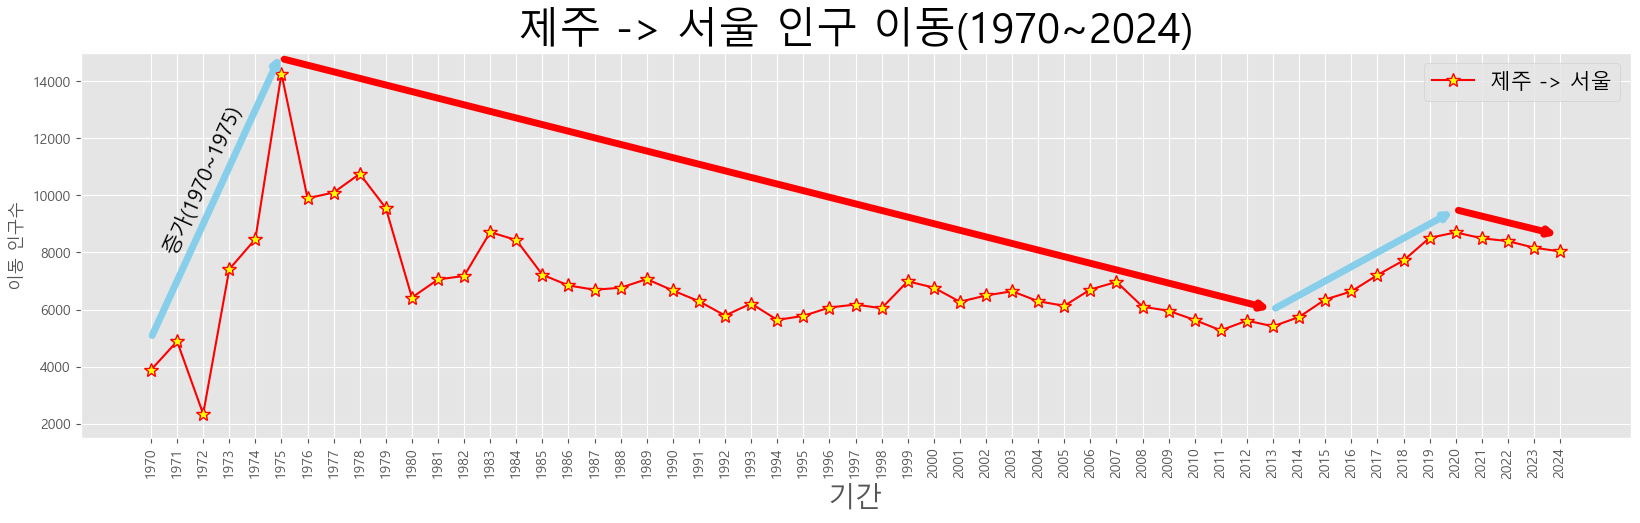

In [28]:
rc('font',family = font_name)
sr_jeju = df_jeju.loc['서울특별시']

#plt.style.use('ggplot')

plt.figure(figsize = (20,5))
plt.xticks(size = 10, rotation = 'vertical')


plt.plot(sr_jeju,
         color = 'red',
         marker = '*', # marker : 마커의 종류 - p176
         markerfacecolor = 'yellow',
         markeredgecolor = 'red',
         markeredgewidth = 1,
         markersize = 10)

plt.title('제주 -> 서울 인구 이동(1970~2024)', size = 30)
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구수')
plt.ylim(1500,15000)
plt.annotate('',
             xy = (5, 15000),
             xytext = (0, 5000),
             xycoords = 'data',
             arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw = 5)
            )
plt.annotate('',
             xy = (43, 6000),
             xytext = (5, 14800),
             xycoords = 'data',
             arrowprops = dict(arrowstyle = '->', color = 'red', lw = 5)
            )
plt.annotate('',
             xy = (50, 9500),
             xytext = (43, 6000),
             xycoords = 'data',
             arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw = 5)
            )
plt.annotate('',
             xy = (54, 8600),
             xytext = (50, 9500),
             xycoords = 'data',
             arrowprops = dict(arrowstyle = '->', color = 'red', lw = 5)
            )
plt.annotate('증가(1970~1975)',
             xy = (2,8000),
             rotation = 66,
             va = 'baseline',
             ha = 'center',
             fontsize = 15
            )
plt.legend(labels = ['제주 -> 서울'], loc = 'best', fontsize = 15) # loc : 범례 위치 옵션 - p175

plt.show()